
## 1 Machine Learning Workflow

1. Define Problem
1. Specify Inputs & Outputs
1. Exploratory Data Analysis
1. Data Collection
1. Data Preprocessing
1. Data Cleaning
1. Visualization
1. Model Design, Training, and Offline Evaluation
1. Model Deployment, Online Evaluation, and Monitoring
1. Model Maintenance, Diagnosis, and Retraining


## Các đặc trưng của tập dữ liệu
Tàu Titanic bị đắm vào **15 tháng 4 năm 1912**, làm chết **1502 / 2224** hành khách và thủy thủ

Trong tập dữ liệu về tàu Titanic này, chúng ta sẽ có **12 đặc trưng như sau**:
1. PassengerId
1. Survival
1. Pclass
1. Name
1. Sex
1. Age
1. SibSp
1. Parch
1. Ticket
1. Fare
1. Cabin
1. Embarked

Chi tiết: https://www.kaggle.com/c/titanic/data


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import warnings
import json
import sys
import csv
import os

import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

import pandas as pd
from pandas import get_dummies

import matplotlib as mpl
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import xgboost as xgb
import seaborn as sns

import scipy
import numpy as np

In [8]:
sns.set(style='white', context='notebook', palette='deep')
pylab.rcParams['figure.figsize'] = 12,8
warnings.filterwarnings('ignore')
mpl.style.use('ggplot')
sns.set_style('white')
%matplotlib inline

## Exploratory Data Analysis(EDA)
*   Data Collection
*   Visualization
*   Data Preprocessing
*   Data Cleaning

<img src="http://s9.picofile.com/file/8338476134/EDA.png">

## Data Collection
Đây là quá trình thu thập bất kì dữ liệu nào đáng chú ý, có tiềm năng giải đáp vấn đầ của chúng ta.

In [9]:
# import train and test to play with it
df_train = pd.read_csv('raw/train.csv')

In [10]:
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


><font color="red"><b>Note: </b></font>

* Cách gọi khác của 1 dòng **dòng**: observation, sample, example, instance, record
* Cách gọi khác của 1 **cột**: feature, attribute


## Visualization
Đây là bước biểu thị dữ liệu dưới dạng hình ảnh, đồ thị.

### Scatter Plot

[Scatter plot](https://en.wikipedia.org/wiki/Scatter_plot) Xác định quan hệ giữa 2 đặc trưng.



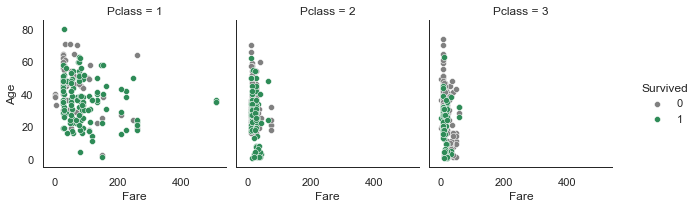

In [11]:
# Modify the graph above by assigning each species an individual color.
g = sns.FacetGrid(df_train, hue="Survived", col="Pclass", margin_titles=True,
                  palette={1:"seagreen", 0:"gray"}) #https://seaborn.pydata.org/generated/seaborn.FacetGrid.html
g=g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend();


### Box
Box là phương pháp mô ta dữ liệu số thông qua những phần tư của chúng.
Chi tiết: 
- https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/box-whisker-plots/a/box-plot-review
- https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/box-whisker-plots/a/identifying-outliers-iqr-rule
<img src="https://miro.medium.com/max/13500/1*2c21SkzJMf3frPXPAR_gZA.png">



### Histogram

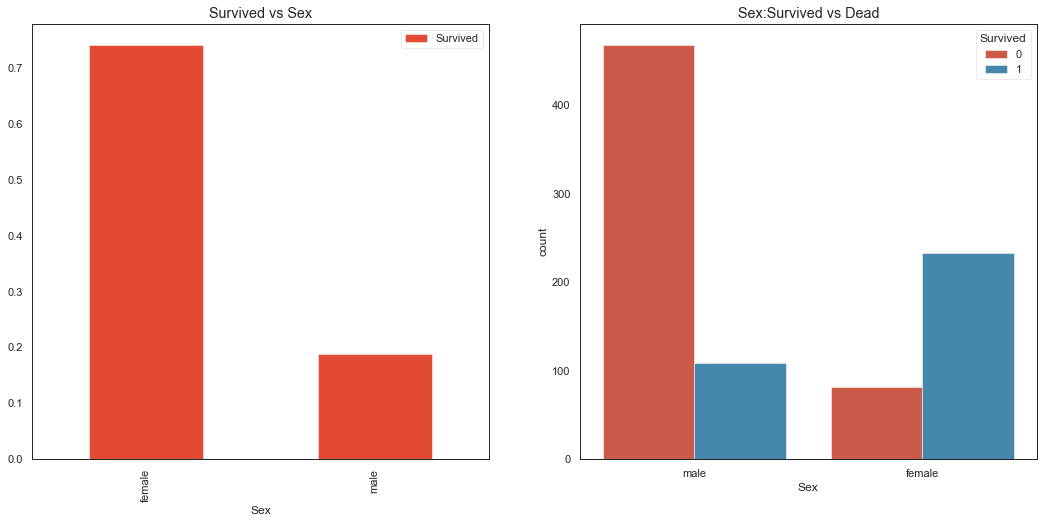

In [12]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df_train[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=df_train,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

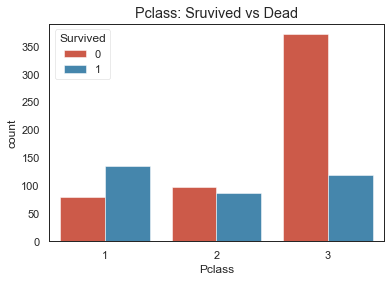

In [13]:
sns.countplot('Pclass', hue='Survived', data=df_train)
plt.title('Pclass: Sruvived vs Dead')
plt.show()


### Pie

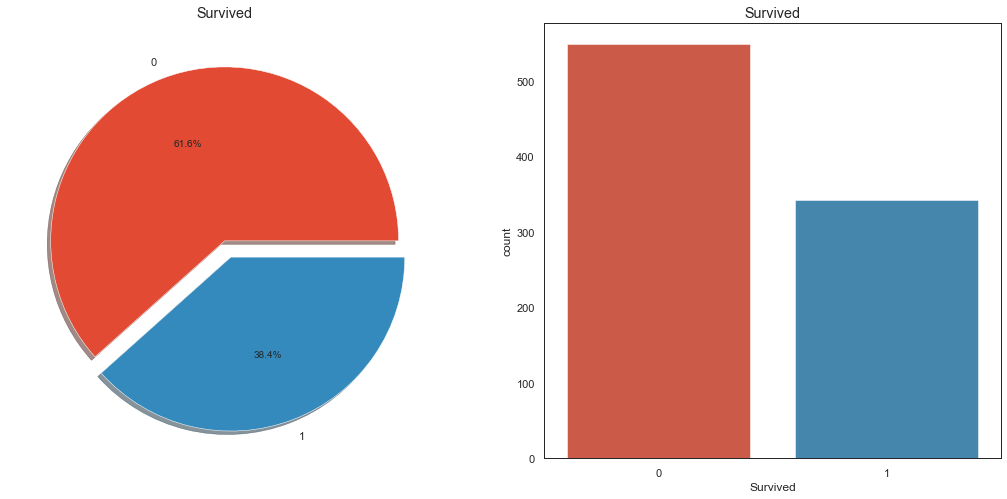

In [14]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df_train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=df_train,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

### Heatmap
Là cách biểu diễn dữ liệu dưới dạng 2 chiều, với mỗi ô có một màu, ứng với giá trị của nó.
[link](https://blog.quantinsti.com/creating-heatmap-using-python-seaborn/)

Covariance & correlation: [link](https://forum.machinelearningcoban.com/t/covariance-va-correlation/767)

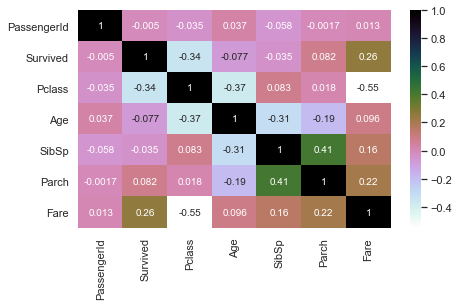

In [15]:
plt.figure(figsize=(7,4)) 
sns.heatmap(df_train.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show();

### Bar Plot

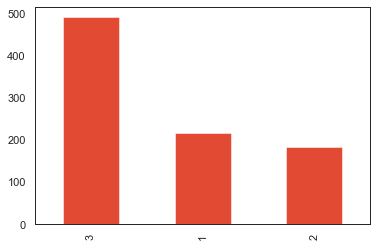

In [16]:
df_train['Pclass'].value_counts().plot(kind="bar");

## Data Preprocessing
**Data preprocessing** là kĩ thuật chuẩn hóa, làm sạch dữ liệu trước khi đưa vào thuật toán.
Một vài bước tiêu biểu của Data preprocessing:
* Xử lý dữ liệu không cân bằng
* Xử lý dữ liệu bị thiếu
* Xử lý nhiễu
* Chuẩn hóa dữ liệu
* Chọn lọc đặc trưng
* ...

## Types of features
Features:
* số 
* theo từng mục (category)
* ngày tháng (datetime)

### Hãy xác định dạng đặc trưng trong tập dữ liệu:
<img src="http://s9.picofile.com/file/8339959442/titanic.png" height="700" width="600" />

## Data exploration

In [17]:
# shape

In [18]:
#columns*rows

>  <font color="red"><b>Note:</b></font>
how many NA elements in every column


Xóa những dòng có giá trị NA

In [19]:
# remove rows that have NA's

Xem số hàng, cột của tập dữ liệu bằng shape

In [20]:
print(df_train.shape)

(891, 12)


Kiểm tra thông tin bằng info()

Lọc ra những giá trị có thể xuất hiện trong từng cột

Đếm số dòng của từng loại vé

Cách preview những dòng đầu tiên hoặc cuối cùng của tập dữ liệu

In [21]:
df_train.head(5) 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
df_train.tail() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Cách xem ngẫu nhiên một vài dòng trong tập dữ liệu

Xem qua thống kê sơ bộ của các cột bằng describe()

In ra tên của những hàng trong tập dữ liệu

In [23]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Ta có thể dùng where để query dữ liệu

In [24]:
# df_train.where(df_train['Age']==30)

df_train.query('Age==30')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
79,80,1,3,"Dowdell, Miss. Elizabeth",female,30.0,0,0,364516,12.4750,NaN,S
157,158,0,3,"Corn, Mr. Harry",male,30.0,0,0,SOTON/OQ 392090,8.0500,NaN,S
178,179,0,2,"Hale, Mr. Reginald",male,30.0,0,0,250653,13.0000,NaN,S
213,214,0,2,"Givard, Mr. Hans Kristensen",male,30.0,0,0,250646,13.0000,NaN,S
219,220,0,2,"Harris, Mr. Walter",male,30.0,0,0,W/C 14208,10.5000,NaN,S
244,245,0,3,"Attalah, Mr. Sleiman",male,30.0,0,0,2694,7.2250,NaN,C
253,254,0,3,"Lobb, Mr. William Arthur",male,30.0,1,0,A/5. 3336,16.1000,NaN,S
257,258,1,1,"Cherry, Miss. Gladys",female,30.0,0,0,110152,86.5000,B77,S
286,287,1,3,"de Mulder, Mr. Theodore",male,30.0,0,0,345774,9.5000,NaN,S
308,309,0,2,"Abelson, Mr. Samuel",male,30.0,1,0,P/PP 3381,24.0000,NaN,C


In [25]:
df_train[df_train['Age']==30].head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
79,80,1,3,"Dowdell, Miss. Elizabeth",female,30.0,0,0,364516,12.475,NaN,S
157,158,0,3,"Corn, Mr. Harry",male,30.0,0,0,SOTON/OQ 392090,8.050,NaN,S
178,179,0,2,"Hale, Mr. Reginald",male,30.0,0,0,250653,13.000,NaN,S
213,214,0,2,"Givard, Mr. Hans Kristensen",male,30.0,0,0,250646,13.000,NaN,S
219,220,0,2,"Harris, Mr. Walter",male,30.0,0,0,W/C 14208,10.500,NaN,S


Tách X, y để huấn luyện

In [26]:
new_columns = ['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived']
df_train = df_train[new_columns]
df_train.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [27]:
new_columns2 = ['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived']
df_train2 = df_train[new_columns2]
df_train2.head(5)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [28]:
X = 
y =

SyntaxError: invalid syntax (<ipython-input-28-2e0222eadbd2>, line 1)

In [ ]:
X

array([[1, 3, 'Braund, Mr. Owen Harris', ..., 7.25, nan, 'S'],
       [2, 1, 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)', ...,
        71.2833, 'C85', 'C'],
       [3, 3, 'Heikkinen, Miss. Laina', ..., 7.925, nan, 'S'],
       ...,
       [889, 3, 'Johnston, Miss. Catherine Helen "Carrie"', ..., 23.45,
        nan, 'S'],
       [890, 1, 'Behr, Mr. Karl Howell', ..., 30.0, 'C148', 'C'],
       [891, 3, 'Dooley, Mr. Patrick', ..., 7.75, nan, 'Q']], dtype=object)

=============================================

In [ ]:
# x_all = df_train.drop(['Survived', 'PassengerId'], axis=1)
# y_all = df_train['Survived']

In [ ]:
# num_test = 0.3

In [ ]:
# X_train.head()

In [ ]:
# logreg = LogisticRegression()

In [29]:
df_train.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


## Feature transformations
Chúng ta sẽ chuyển đổi dữ liệu sang một dạng mới với kì vọng sẽ đem lại giá trị tốt hơn cho việc phân tích, đưa ra quyết định
Ở đây chúng ta sẽ biến đổi:
1. Age
1. Cabin
1. Fare
1. Name

In [30]:
def simplify_ages(df):
    df.Age = df.Age.fillna(-0.5)
    bins = (-1, 0, 5, 12, 18, 25, 35, 60, 120)
    group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
    categories = pd.cut(df.Age, bins, labels=group_names)
    df.Age = categories
    return df

def simplify_cabins(df):
    df.Cabin = df.Cabin.fillna('N')
    df.Cabin = df.Cabin.apply(lambda x: x[0])
    return df

def simplify_fares(df):
    df.Fare = df.Fare.fillna(-0.5)
    bins = (-1, 0, 8, 15, 31, 1000)
    group_names = ['Unknown', '1_quartile', '2_quartile', '3_quartile', '4_quartile']
    categories = pd.cut(df.Fare, bins, labels=group_names)
    df.Fare = categories
    return df

def format_name(df):
    df['Lname'] = df.Name.apply(lambda x: x.split(' ')[0])
    df['NamePrefix'] = df.Name.apply(lambda x: x.split(' ')[1])
    return df    
    
def drop_features(df):
    return df.drop(['Ticket', 'Name', 'Embarked'], axis=1)

def transform_features(df):
    df = simplify_ages(df)
    df = simplify_cabins(df)
    df = simplify_fares(df)
    df = format_name(df)
    df = drop_features(df)
    return df

df_train = transform_features(df_train)
df_train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Survived,Lname,NamePrefix
0,1,3,male,Student,1,0,1_quartile,N,0,"Braund,",Mr.
1,2,1,female,Adult,1,0,4_quartile,C,1,"Cumings,",Mrs.
2,3,3,female,Young Adult,0,0,1_quartile,N,1,"Heikkinen,",Miss.
3,4,1,female,Young Adult,1,0,4_quartile,C,1,"Futrelle,",Mrs.
4,5,3,male,Young Adult,0,0,2_quartile,N,0,"Allen,",Mr.


## Feature Encoding

Một số cách mã hóa đặc trưng:
- One hot encoding
- TFIDF

In [31]:
def encode_features(df_train):
    features = ['Fare', 'Cabin', 'Age', 'Sex', 'Lname', 'NamePrefix']
    df_combined = df_train[features]
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_combined[feature])
        df_train[feature] = le.transform(df_train[feature])
    return df_train

## Prepare Features & Targets

* X ==>> Feature
* y ==>> Target

In [33]:
#Encode Dataset
df_train = encode_features(df_train)
df_train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Survived,Lname,NamePrefix
0,1,3,1,4,1,0,0,7,0,73,17
1,2,1,0,0,1,0,3,2,1,136,18
2,3,3,0,7,0,0,0,7,1,251,14
3,4,1,0,7,1,0,3,2,1,198,18
4,5,3,1,7,0,0,1,7,0,11,17


In [51]:
x_all = df_train.drop(['PassengerId', 'Survived'], axis=1)
y_all = df_train['Survived']

num_test = 0.3
X_train, X_test, y_train, y_test = train_test_split(x_all, y_all, test_size=num_test, random_state=1)

logreg = LogisticRegression()
# logreg.fit(X_train, y_train)

TypeError: Singleton array array(<bound method DataFrame.drop of      PassengerId  Pclass  Sex       Age  SibSp  Parch      Fare  Cabin  \
0              1       3    1 -0.011933      1      0 -1.315798      7   
1              2       1    0 -1.530855      1      0  1.260853      2   
2              3       3    0  1.127258      0      0 -1.315798      7   
3              4       1    0  1.127258      1      0  1.260853      2   
4              5       3    1  1.127258      0      0 -0.456915      7   
..           ...     ...  ...       ...    ...    ...       ...    ...   
886          887       2    1  1.127258      0      0 -0.456915      7   
887          888       1    0 -0.011933      0      0  0.401969      1   
888          889       3    0  0.747528      1      2  0.401969      7   
889          890       1    1  1.127258      0      0  0.401969      2   
890          891       3    1  1.127258      0      0 -1.315798      7   

     Survived  Lname  NamePrefix  
0           0     73          17  
1           1    136          18  
2           1    251          14  
3           1    198          18  
4           0     11          17  
..        ...    ...         ...  
886         0    406          23  
887         1    221          14  
888         0    293          14  
889         1     52          17  
890         0    159          17  

[891 rows x 11 columns]>, dtype=object) cannot be considered a valid collection.

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#We need to reshape our data since the Scaler takes in arrays
ages_train = np.array(df_train["Age"]).reshape(-1, 1)
fares_train = np.array(df_train["Fare"]).reshape(-1, 1)

df_train["Age"] = scaler.fit_transform(ages_train)
df_train["Fare"] = scaler.fit_transform(fares_train)

In [38]:
df_train.head(5)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Survived,Lname,NamePrefix
0,1,3,1,-0.011933,1,0,-1.315798,7,0,73,17
1,2,1,0,-1.530855,1,0,1.260853,2,1,136,18
2,3,3,0,1.127258,0,0,-1.315798,7,1,251,14
3,4,1,0,1.127258,1,0,1.260853,2,1,198,18
4,5,3,1,1.127258,0,0,-0.456915,7,0,11,17


# Chuẩn bị X(features) , y(target)

In [39]:
x_all = df_train.drop(['Survived', 'PassengerId'], axis=1)
y_all = df_train['Survived']

In [40]:
num_test = 0.3
X_train, X_test, y_train, y_test = train_test_split(x_all, y_all, test_size=num_test, random_state=100)

## Accuracy and F1

Titanic là bài toán phân loại (sống sót hay không), do đó chúng ta sẽ có có một số metric phù hợp như sau:

1. **accuracy** 

1. **precision** : (số dự đoán chính xác / tổng số dự đoán)

1. **recall** : (số dự đoán sống sót chính xác / tổng số người sống sót)

1. **F-score** : (precision x recall / precision + recall)

    1. F1 score tốt nhất là 1, tệ nhất là 0.

<img src="https://machinelearningcoban.com/assets/33_evaluation/PR.png">

<a id="76"></a> <br>
## Logistic Regression

In [41]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
logreg_prediction = logreg.predict(X_test)
logreg_score = accuracy_score(y_test, logreg_prediction)
print(logreg_score)

0.7835820895522388


## GRIDSEARCH

In [43]:
logreg_clf = LogisticRegression()

parameters_logreg = {"fit_intercept": [True, False],
                     "max_iter": [10, 50, 100, 200, 500, 1000], 
                     "warm_start": [True, False]}

grid_logreg = GridSearchCV(logreg_clf, parameters_logreg, scoring=make_scorer(accuracy_score))
grid_logreg.fit(X_train, y_train)

logreg_clf = grid_logreg.best_estimator_

logreg_clf.fit(X_train, y_train)

logreg_prediction = logreg_clf.predict(X_test)
logreg_score = accuracy_score(y_test, logreg_prediction)
print(logreg_score)

0.7947761194029851


In [44]:
X_train.shape

(623, 9)

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten , Dense, Activation, Dropout

def create_model(dropout_rate=0.0, activation='relu', optimizer='adam'):
    model = Sequential()
    model.add(Dense(64, input_shape=(9, )))
    model.add(Activation(activation))
    model.add(Dropout(dropout_rate))

    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    model.compile(
        loss='binary_crossentropy',  
        optimizer=optimizer, 
        metrics=['accuracy']  # report accuracy during training
    )
    return model

In [46]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640       
_________________________________________________________________
activation (Activation)      (None, 64)                0         
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 705
Trainable params: 705
Non-trainable params: 0
_________________________________________________________________


In [47]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

model = KerasClassifier(
    build_fn=create_model,
    epochs=20, batch_size=10, verbose=0)


# define the grid search parameters
# batch_size = [16, 32, 64, 128]
epochs = [50, 100, 200]
# dropout_rate = [0, 0.1, 0.2, 0.3, 0.4, 0.5]
# activation = ['relu', 'tanh', 'sigmoid']
# optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']

dropout_rate = [0.2, 0.1]
param_grid = dict(
                  dropout_rate=dropout_rate)

# search the grid
grid = GridSearchCV(estimator=model, 
                    param_grid=param_grid,
                    verbose=2,
                    cv=5,
                    )

grid.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid.best_score_, grid.best_params_))

means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] dropout_rate=0.2 ................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................. dropout_rate=0.2, total=   1.8s
[CV] dropout_rate=0.2 ................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


[CV] ................................. dropout_rate=0.2, total=   1.5s
[CV] dropout_rate=0.2 ................................................
[CV] ................................. dropout_rate=0.2, total=   1.5s
[CV] dropout_rate=0.2 ................................................
[CV] ................................. dropout_rate=0.2, total=   1.5s
[CV] dropout_rate=0.2 ................................................
[CV] ................................. dropout_rate=0.2, total=   1.8s
[CV] dropout_rate=0.1 ................................................
[CV] ................................. dropout_rate=0.1, total=   1.6s
[CV] dropout_rate=0.1 ................................................
[CV] ................................. dropout_rate=0.1, total=   1.6s
[CV] dropout_rate=0.1 ................................................
[CV] ................................. dropout_rate=0.1, total=   1.5s
[CV] dropout_rate=0.1 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   15.8s finished


Best: 0.688568 using {'dropout_rate': 0.2}
0.688568 (0.039269) with: {'dropout_rate': 0.2}
0.666142 (0.048606) with: {'dropout_rate': 0.1}


In [48]:
grid_best = grid.best_estimator_

history = grid_best.fit(X_train, y_train)

logreg_prediction = grid_best.predict(X_test)
logreg_score = accuracy_score(y_test, logreg_prediction)
print(logreg_score)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
0.6865671641791045


In [49]:
 history.history['loss']

[11.865008354187012,
 8.859161376953125,
 8.770779609680176,
 8.030024528503418,
 6.624002933502197,
 6.222160816192627,
 5.086430072784424,
 5.023978233337402,
 4.17503023147583,
 3.5518460273742676,
 3.243176221847534,
 2.6260390281677246,
 2.384772539138794,
 2.5526654720306396,
 2.2308108806610107,
 1.7889041900634766,
 1.5748896598815918,
 1.301112174987793,
 1.119343638420105,
 1.030333161354065]

In [50]:
acc = history.history['acc']

loss = history.history['loss']

epochs_range = range(20)

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training  Loss')

plt.show()

KeyError: 'acc'